<a href="https://colab.research.google.com/github/krishna-kowshik-jampu/Predictive-analytics-for-data-science/blob/main/House%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the uploaded Excel file
df = pd.read_excel('/content/HousePrediction (1).xlsx')  # Use exact path/name

# Step 3: Display shape and first few rows
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


Dataset contains 2919 rows and 13 columns.


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [7]:
df.head(100)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [9]:
df.describe(include='all')  # Includes both numerical and categorical


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2915,2919.000000,2919,2919,2919.000000,2919.000000,2919.000000,2918,2918.000000,2918.000000,1460.000000
unique,NaN,NaN,5,NaN,5,5,NaN,NaN,NaN,15,NaN,NaN,NaN
top,NaN,NaN,RL,NaN,Inside,1Fam,NaN,NaN,NaN,VinylSd,NaN,NaN,NaN
freq,NaN,NaN,2265,NaN,2133,2425,NaN,NaN,NaN,1025,NaN,NaN,NaN
mean,1459.000000,57.137718,NaN,10168.114080,NaN,NaN,5.564577,1971.312778,1984.264474,NaN,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,NaN,7886.996359,NaN,NaN,1.113131,30.291442,20.894344,NaN,169.205611,440.766258,79442.502883
min,0.000000,20.000000,NaN,1300.000000,NaN,NaN,1.000000,1872.000000,1950.000000,NaN,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,NaN,7478.000000,NaN,NaN,5.000000,1953.500000,1965.000000,NaN,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,NaN,9453.000000,NaN,NaN,5.000000,1973.000000,1993.000000,NaN,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,NaN,11570.000000,NaN,NaN,6.000000,2001.000000,2004.000000,NaN,0.000000,1302.000000,214000.000000


In [10]:
  # Separate columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
Categorical Columns: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [11]:
# Total missing values per column
missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Columns with missing values:")
print(missing_values)


Columns with missing values:
SalePrice      1459
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
dtype: int64


In [12]:
categorical_missing = ['Exterior1st', 'MSZoning']

for col in categorical_missing:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


/tmp/ipython-input-12-874560321.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [13]:
numerical_missing = ['BsmtFinSF2']

for col in numerical_missing:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


/tmp/ipython-input-13-3667595086.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [14]:
df.isnull().sum().sum()


np.int64(1460)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


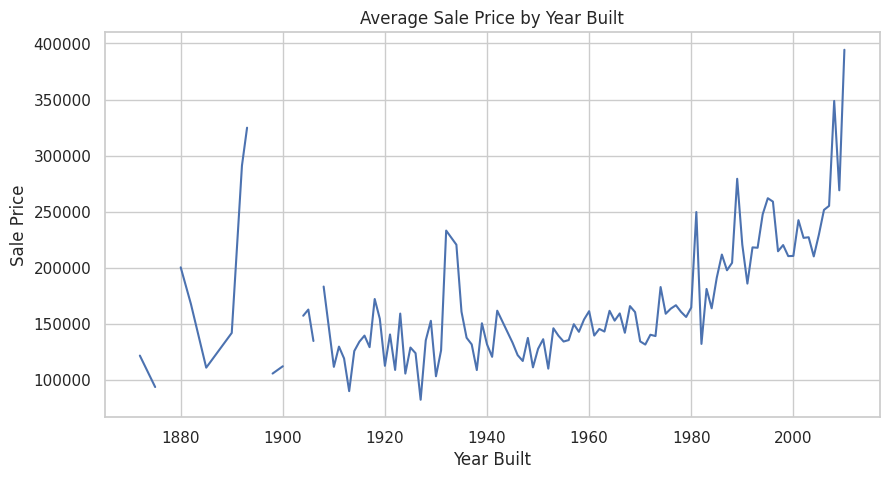

In [21]:
# Average price for each YearBuilt
df.groupby('YearBuilt')['SalePrice'].mean().plot(kind='line', figsize=(10,5))
plt.title("Average Sale Price by Year Built")
plt.ylabel("Sale Price")
plt.xlabel("Year Built")
plt.show()



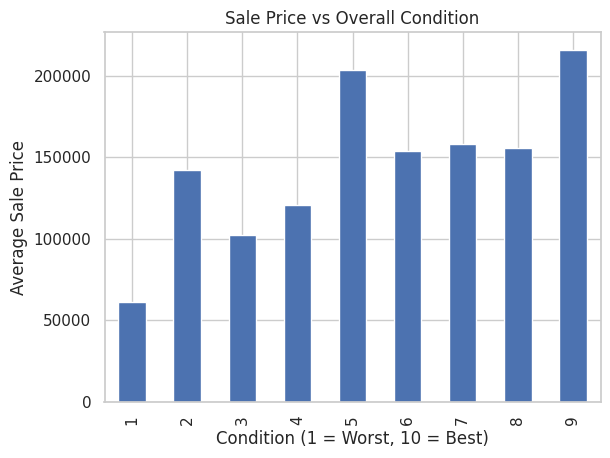

In [22]:
df.groupby('OverallCond')['SalePrice'].mean().plot(kind='bar')
plt.title("Sale Price vs Overall Condition")
plt.ylabel("Average Sale Price")
plt.xlabel("Condition (1 = Worst, 10 = Best)")
plt.show()


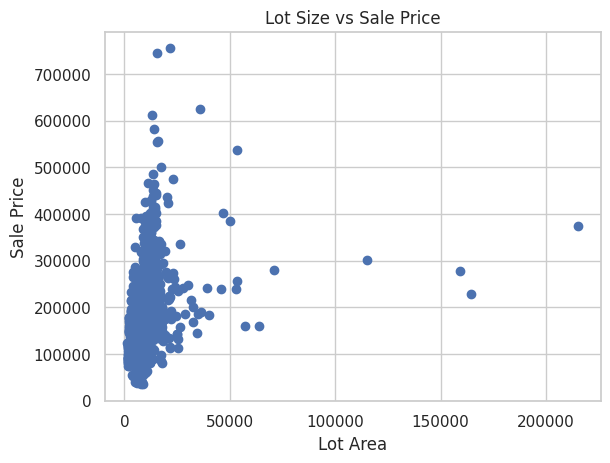

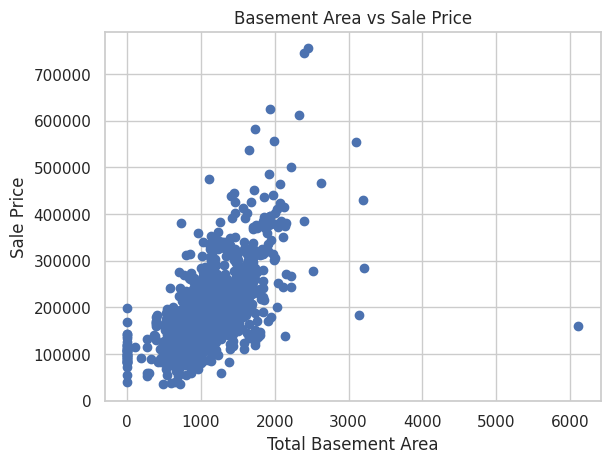

In [23]:
# Lot size vs price
plt.scatter(df['LotArea'], df['SalePrice'])
plt.title("Lot Size vs Sale Price")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

# Basement area vs price
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.title("Basement Area vs Sale Price")
plt.xlabel("Total Basement Area")
plt.ylabel("Sale Price")
plt.show()


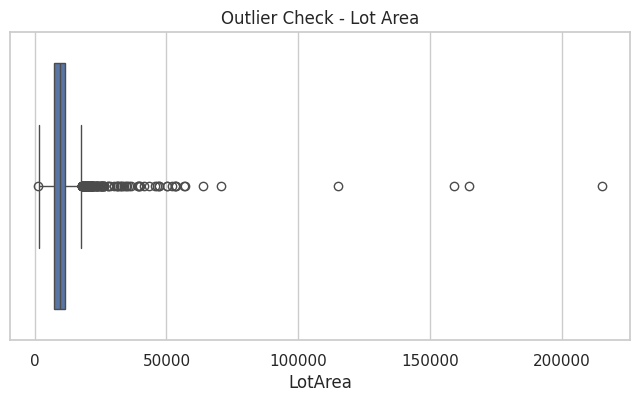

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['LotArea'])
plt.title("Outlier Check - Lot Area")
plt.show()


In [25]:
# Remove houses with LotArea > 100000
df = df[df['LotArea'] < 100000]

# Remove houses with SalePrice > 600000
df = df[df['SalePrice'] < 600000]


In [27]:
# Check correlations
corr = df.corr(numeric_only=True)

# Sort by SalePrice
important_corr = corr['SalePrice'].sort_values(ascending=False)
print(important_corr)


SalePrice       1.000000
TotalBsmtSF     0.602986
YearBuilt       0.542322
YearRemodAdd    0.529291
LotArea         0.343043
BsmtFinSF2     -0.015221
Id             -0.031080
OverallCond    -0.078017
MSSubClass     -0.086515
Name: SalePrice, dtype: float64


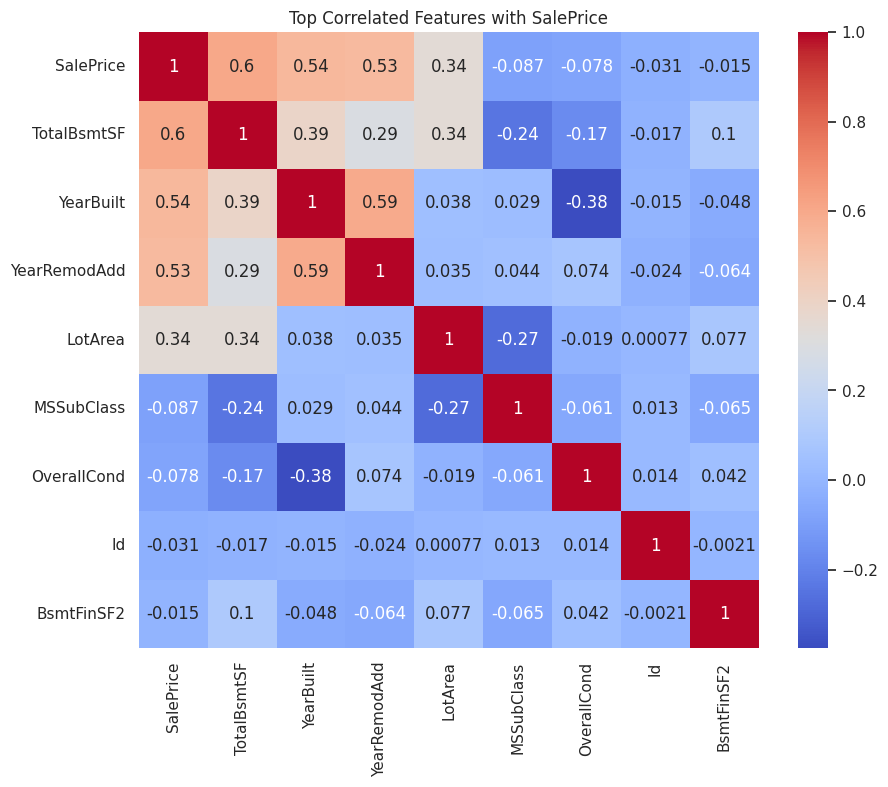

In [28]:
# Top 10 features most correlated with SalePrice
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()


In [29]:
# One-hot encoding example for MSZoning
df = pd.get_dummies(df, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], drop_first=True)


In [30]:
# Create house age
df['HouseAge'] = 2025 - df['YearBuilt']

# Years since remodel
df['YearsSinceRemodel'] = 2025 - df['YearRemodAdd']

# Has basement (binary)
df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)


In [31]:
import numpy as np

# Apply log1p (log(1+x)) to avoid log(0)
df['SalePrice'] = np.log1p(df['SalePrice'])
df['LotArea'] = np.log1p(df['LotArea'])
df['TotalBsmtSF'] = np.log1p(df['TotalBsmtSF'])


In [32]:
df.drop(['Id'], axis=1, inplace=True)  # Drop ID column


In [33]:
# Set target variable
y = df['SalePrice']

# Set features (drop SalePrice)
X = df.drop(['SalePrice'], axis=1)


In [34]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Predict on test data
y_pred = lr_model.predict(X_test)


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print("🔍 Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.3f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.3f}")
print(f"R²   (R-squared / Accuracy):      {r2:.3f}")


🔍 Model Evaluation Metrics:
MAE  (Mean Absolute Error):      0.159
RMSE (Root Mean Squared Error):  0.211
R²   (R-squared / Accuracy):      0.730


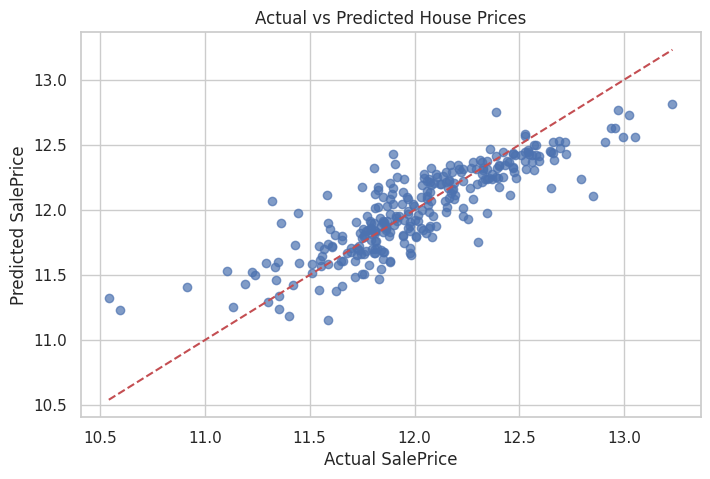

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


In [41]:
# Create the model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
## Predict on the test set
y_pred_rf = rf_model.predict(X_test)



In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Model Evaluation:")
print(f"MAE  (Mean Absolute Error):      {mae_rf:.3f}")
print(f"RMSE (Root Mean Squared Error):  {rmse_rf:.3f}")
print(f"R²   (R-squared / Accuracy):      {r2_rf:.3f}")


🌲 Random Forest Model Evaluation:
MAE  (Mean Absolute Error):      0.135
RMSE (Root Mean Squared Error):  0.201
R²   (R-squared / Accuracy):      0.754


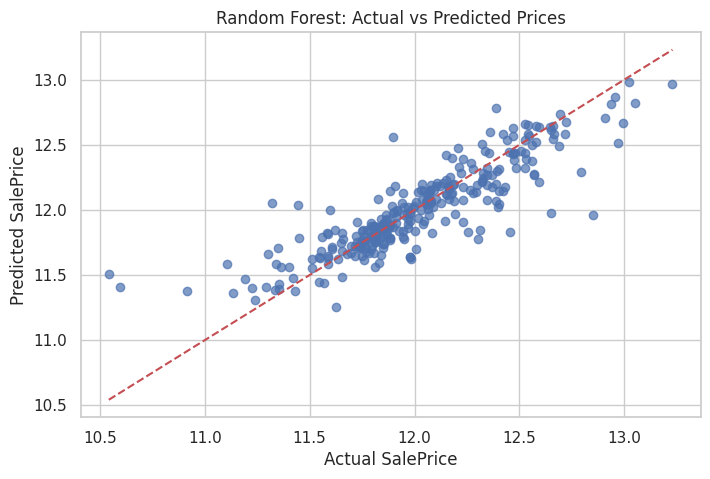

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


Dataset shape: (2919, 13)

First few rows:
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  

🌲 Random Forest Model Evaluation:
MAE:  22959.446
RMSE: 37398.105
R

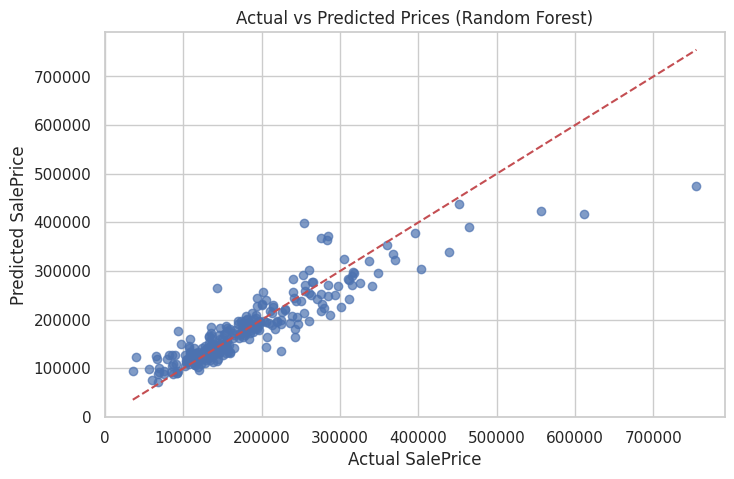


💰 Predicted House Price (Manual Input): ₹204,162.80


In [48]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# STEP 2: LOAD DATA
df = pd.read_excel('HousePrediction (1).xlsx')

# STEP 3: INITIAL VIEW
pd.set_option('display.max_columns', None)
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# STEP 4: HANDLE MISSING VALUES
df.fillna({
    'TotalBsmtSF': df['TotalBsmtSF'].median(),
    'BsmtFinSF2': df['BsmtFinSF2'].median(),
    'Exterior1st': df['Exterior1st'].mode()[0]
}, inplace=True)

# 🔥 FIX: Drop rows where target variable is missing
df = df[df['SalePrice'].notna()]

# STEP 5: FEATURE ENGINEERING
df['HouseAge'] = 2025 - df['YearBuilt']
df['YearsSinceRemodel'] = 2025 - df['YearRemodAdd']
df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df.drop(['Id'], axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], drop_first=True)

# STEP 6: MODEL BUILDING
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n🌲 Random Forest Model Evaluation:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

# STEP 7: MANUAL INPUT PREDICTION
train_columns = X_train.columns

user_input = {
    'MSSubClass': 60,
    'LotArea': 8450,
    'OverallCond': 5,
    'YearBuilt': 2003,
    'YearRemodAdd': 2003,
    'BsmtFinSF2': 0,
    'TotalBsmtSF': 856,
    'HouseAge': 2025 - 2003,
    'YearsSinceRemodel': 2025 - 2003,
    'HasBasement': 1,
    'MSZoning': 'RL',
    'LotConfig': 'Inside',
    'BldgType': '1Fam',
    'Exterior1st': 'VinylSd'
}

user_df = pd.DataFrame([user_input])
user_df = pd.get_dummies(user_df)
user_df = user_df.reindex(columns=train_columns, fill_value=0)

predicted_price = rf_model.predict(user_df)[0]
print(f"\n💰 Predicted House Price (Manual Input): ₹{predicted_price:,.2f}")



# New section